In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
rng = np.random.default_rng(1) # seed is set to 1

# 13(a)

In [6]:
x = rng.normal(size=100) # feature X

In [7]:
x

array([ 3.30437076e-01, -1.30315723e+00,  9.05355867e-01,  4.46374572e-01,
       -5.36953235e-01,  5.81118104e-01,  3.64572396e-01,  2.94132497e-01,
        2.84222413e-02,  5.46712987e-01, -7.36454087e-01, -1.62909948e-01,
       -4.82119313e-01,  5.98846213e-01,  3.97221075e-02, -2.92456751e-01,
       -7.81908462e-01, -2.57192241e-01,  8.14218052e-03, -2.75602905e-01,
        1.29406381e+00,  1.00672432e+00, -2.71116248e+00, -1.88901325e+00,
       -1.74772092e-01, -4.22190412e-01,  2.13642997e-01,  2.17321931e-01,
        2.11783876e+00, -1.11202076e+00, -3.77605007e-01,  2.04277161e+00,
        6.46702996e-01,  6.63063372e-01, -5.14006372e-01, -1.64807517e+00,
        1.67464744e-01,  1.09014088e-01, -1.22735205e+00, -6.83226662e-01,
       -7.20436797e-02, -9.44751623e-01, -9.82699679e-02,  9.54830275e-02,
        3.55862371e-02, -5.06291658e-01,  5.93748072e-01,  8.91166954e-01,
        3.20848305e-01, -8.18230227e-01,  7.31652284e-01, -5.01440018e-01,
        8.79160618e-01, -

# 13(b)

In [8]:
eps = rng.normal(size=100, loc=0, scale=0.25) # loc is mean and scale is standard deviation
eps

array([-3.13980210e-02,  1.67288310e-01,  3.04710901e-01,  9.57323957e-02,
       -2.18930286e-01, -3.78579658e-01,  4.38346029e-01, -2.78230483e-02,
       -1.72141237e-01,  3.60642720e-02, -4.78528326e-02,  2.13035566e-01,
        8.48204561e-03,  3.43739590e-03, -1.78644930e-01,  1.17392025e-01,
       -2.58466681e-01,  1.66472360e-01,  3.80984378e-01, -3.81171510e-01,
       -6.16557308e-01,  1.54219689e-01,  6.36974454e-01, -2.50231212e-01,
       -3.12673940e-01,  1.47242233e-01, -2.10180398e-01, -1.26506371e-01,
       -8.70293667e-02,  1.33000522e-01, -1.01325590e-01,  6.94707100e-02,
       -4.41333147e-02, -2.11167776e-01, -7.99565644e-02, -2.37599916e-01,
        1.62874647e-03, -2.80966557e-01, -2.73223592e-01,  3.64240454e-01,
       -1.32960551e-02, -1.34755064e-02,  1.27884105e-01, -1.05214251e-01,
       -5.71338419e-02,  1.06287184e-01,  7.06039606e-02, -2.89824182e-01,
        2.08335649e-01, -1.47608736e-01, -2.64019738e-01, -2.25118767e-01,
       -9.76363361e-02,  

# 13(c)

In [9]:
# setting epsilon error to standard normal distributed rv
y = -1 + 0.5*x + rng.normal(size=100)
y

array([-1.8995525 , -1.27876349, -1.2206245 , -0.80038265, -2.5341136 ,
        1.15770457, -1.78689331, -1.14901757, -0.48430595, -1.37420419,
       -1.60753947, -1.64509482, -1.37452041, -1.87111953, -1.41812702,
       -1.3531213 , -1.72468023, -1.07190617, -1.28903113, -0.38459004,
       -0.67616402, -0.63328744, -3.02036258, -2.47102146, -2.35187884,
       -0.69231028, -2.03569652, -1.63719543,  0.41816403, -1.15343702,
       -1.58891725, -1.99788001, -0.25613521, -0.40890485, -2.6693844 ,
       -1.0537155 , -1.61736743, -2.07168107, -1.51794532, -1.52008376,
       -0.83339784, -3.07812387,  0.76309513, -1.5549171 , -2.52186619,
       -0.63430364, -1.05793009, -0.22955804, -1.17918428, -1.46885547,
       -0.38840101, -1.99737289,  0.11831991, -2.00579381, -1.41245354,
       -0.93299931, -1.17933317, -1.38602908, -1.83546865, -0.24381876,
       -3.25142285, -2.58455066, -0.86068484, -2.59443421, -0.85425293,
       -0.67510336, -0.92565389, -1.78759629, -1.01358304, -0.81

In [11]:
y.shape

(100,)

Length of vector y is 100.

In [10]:
X_model_matrix = pd.DataFrame({"intercept":np.ones(100), "X":x})
X_model_matrix

,intercept,X
0,1.0,0.330437
1,1.0,-1.303157
2,1.0,0.905356
3,1.0,0.446375
4,1.0,-0.536953
...,...,...
95,1.0,0.033000
96,1.0,-1.425349
97,1.0,0.332814
98,1.0,-0.651281


In [12]:
result = sm.OLS(y, X_model_matrix).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     19.54
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.55e-05
Time:                        19:13:41   Log-Likelihood:                -127.15
No. Observations:                 100   AIC:                             258.3
Df Residuals:                      98   BIC:                             263.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2110      0.088    -13.827      0.000      -1.385      -1.037
X              0.4518      0.102      4.421      0.000       0.249       0.655
==============================================================================
Omnibus:                       10.891   Durbin-Watson:                   2.687
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.665
Skew:                           0.499   Prob(JB):                     0.000397
Kurtosis:                       4.663   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Value of B0 is -1 and B1 is 0.5.(It actually asked true coefficient values of the model)

# 13(d)

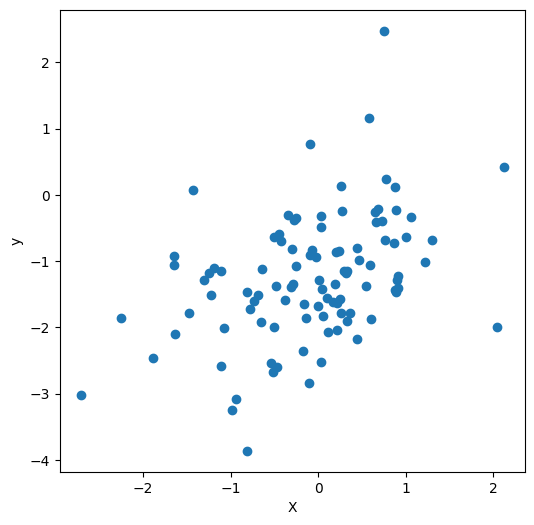

In [13]:
ax = plt.subplots(figsize=(6, 6))[1]
ax.scatter(x, y)
ax.set_xlabel("X")
ax.set_ylabel("y");

There seems to be no particular relation, however we can see it from a coarse point of view that y has almost linear relationship with X.

and there seems to be no evidence of high leverage point or outliers.

another observation, The point seems to be mostly dense near 0, Because y has standard deviation of 0.25 and x has standard deviation of 1.

# 13(e)

From 12(c), when we fit a linear regression model, we see that B0 = -1.2110 and B1 is 0.4518.

well estimated B0 is withing 17.4% error and estimated B1 is within 10.7% error and true B0 and true B1 lies withing the confidence interval.

# 13(f)

In [17]:
result.params[1]

0.451815473813206

In [19]:
def abline(ax, slope, intercept, labelx,*args, **kwargs):
    x_vals = np.array(ax.get_xlim())
    y_vals = x_vals*slope + intercept
    ax.plot(x_vals, y_vals, label=labelx,*args, **kwargs)

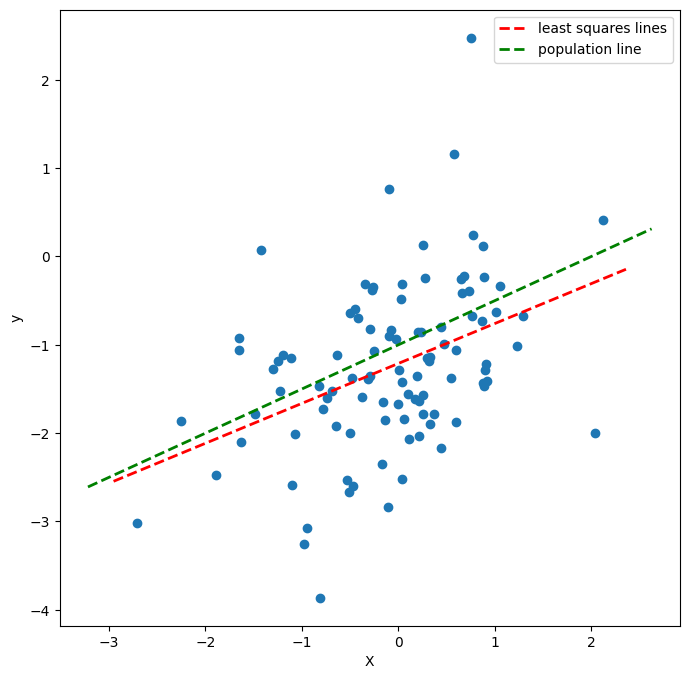

In [24]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y)
ax.set_xlabel("X")
ax.set_ylabel("y")
abline(ax, result.params[1], result.params[0], "least squares lines", color="r", linestyle="--", linewidth=2)
abline(ax, 0.5, -1, "population line", color="g", linestyle="--",linewidth=2)
ax.legend();

# 13(g)

In [25]:
X_model_matrix_new = pd.DataFrame({"intercept":np.ones(100), "X":x, "X**2":x**2})
result_new = sm.OLS(y, X_model_matrix_new).fit()
result_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     9.679
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           0.000147
Time:                        19:37:43   Log-Likelihood:                -127.15
No. Observations:                 100   AIC:                             260.3
Df Residuals:                      97   BIC:                             268.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2176      0.104    -11.742      0.000      -1.423      -1.012
X              0.4564      0.110      4.166      0.000       0.239       0.674
X**2           0.0095      0.079      0.120      0.905      -0.147       0.166
==============================================================================
Omnibus:                       10.869   Durbin-Watson:                   2.686
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.662
Skew:                           0.497   Prob(JB):                     0.000397
Kurtosis:                       4.665   Cond. No.                         2.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### We can see that the t-statistic value for X**2 is pretty low and therefore p-value for that coefficient is high, so there's an evidence that we can follow null hypothesis for this coefficient estimate.

#### Therefore there is no evidence that the quadratic term improves the model fit. We can even see the R-squared value, it hasn't even changed one bit.

# 13(h)

##### now `decrease the noise` by decreasing the standard deviation of the normal distribution which is used to generate the error term

In [26]:
y1 = -1 + 0.5*x + rng.normal(loc=0, scale=0.2, size=100)
y1

array([-0.93103752, -1.79187448, -0.51968334, -0.83499622, -0.9807019 ,
       -0.70940062, -0.75293141, -0.66252938, -1.04594005, -0.4392962 ,
       -1.49476589, -1.24312051, -1.31431306, -0.72352037, -1.26040259,
       -1.15324733, -1.72445155, -0.85016844, -1.0121283 , -1.266193  ,
       -0.53463572, -0.57352394, -2.40019713, -2.15340882, -1.27134506,
       -1.24853021, -0.99733525, -0.70349641,  0.28649345, -1.55280614,
       -1.09408259, -0.24565187, -0.54916496, -0.67458501, -1.16006952,
       -1.50396636, -1.37243918, -0.89330332, -1.83349984, -1.22317399,
       -1.29868453, -1.57145572, -1.00858823, -0.82955661, -0.96724806,
       -1.41171202, -0.81383241, -0.37751594, -0.84067577, -1.74587799,
       -0.46544132, -1.16747031, -0.38573658, -1.6032192 , -0.37713509,
       -1.22224471, -1.51037448, -1.2550258 , -0.83807852, -0.66247551,
       -1.63829209, -1.56393242, -0.89241681, -0.99544184, -0.74013558,
       -0.86409575, -1.73287203, -0.7237881 ,  0.03708466, -1.48

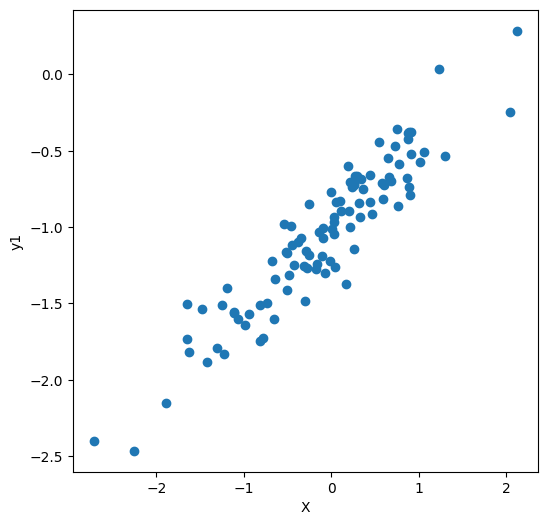

In [27]:
ax = plt.subplots(figsize=(6, 6))[1]
ax.scatter(x, y1)
ax.set_xlabel("X")
ax.set_ylabel("y1");

AHA! We can now see the low noise.

In [38]:
X_model_matrix1 = pd.DataFrame({"intercept":np.ones(100), "X":x})
result1 = sm.OLS(y1, X_model_matrix1).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     661.6
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           2.27e-45
Time:                        19:55:57   Log-Likelihood:                 32.796
No. Observations:                 100   AIC:                            -61.59
Df Residuals:                      98   BIC:                            -56.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0038      0.018    -56.735      0.000      -1.039      -0.969
X              0.5311      0.021     25.722      0.000       0.490       0.572
==============================================================================
Omnibus:                        1.199   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.549   Jarque-Bera (JB):                1.133
Skew:                          -0.111   Prob(JB):                        0.568
Kurtosis:                       2.528   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) B0 is -1.0038 and B1 is 0.5311.
2) Their error rates from original values are 0.3% for B0 and 5.85% for B1. Pretty low because of low noise.

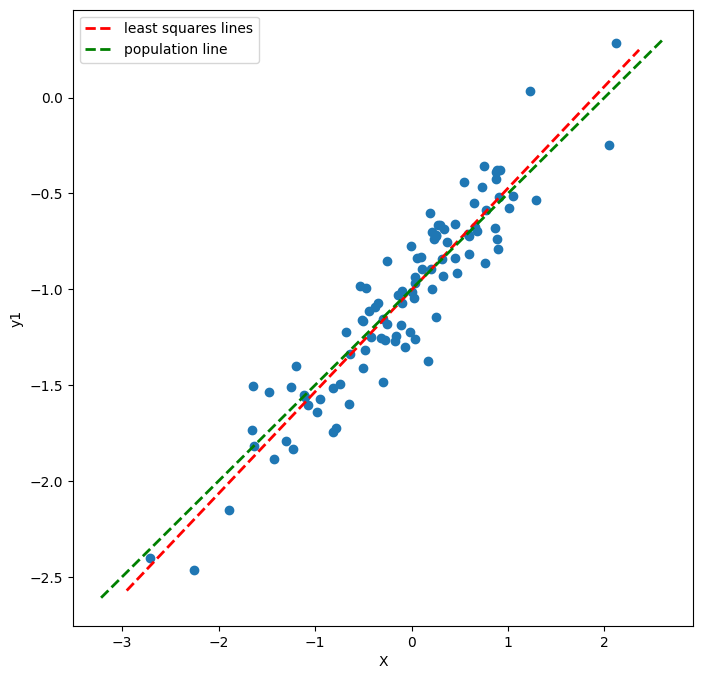

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y1)
ax.set_xlabel("X")
ax.set_ylabel("y1")
abline(ax, result1.params[1], result1.params[0], "least squares lines", color="r", linestyle="--", linewidth=2)
abline(ax, 0.5, -1, "population line", color="g", linestyle="--",linewidth=2)
ax.legend();

# 13(i)

## Now doing the same but now by `increasing the noise`.

In [32]:
y2 = -1 + 0.5*x + rng.normal(loc=0, scale=2, size=100)
y2

array([-3.60960793e+00, -3.80661961e+00, -2.94904828e+00,  1.44392289e+00,
       -3.04464634e+00,  6.27871878e-01,  3.57306503e-01, -3.33592930e-01,
       -3.60094669e+00, -1.95085626e+00,  1.97800290e+00, -3.66296377e+00,
       -2.90436958e+00, -1.02506994e+00,  6.37841198e-01, -6.42949994e-01,
        9.31340874e-02, -3.26318459e+00,  8.93624278e-01,  2.56180508e-04,
       -3.54209720e+00,  2.58319457e+00,  2.22921448e+00, -3.48166134e+00,
       -9.76080413e-01,  1.58374996e+00, -3.85565896e+00, -4.87105967e+00,
       -2.53496887e+00, -2.69014395e+00, -2.34568693e+00,  1.23608015e+00,
       -1.39575758e-01, -3.16062284e+00, -1.22243246e-01,  1.92412510e+00,
        1.47784093e+00,  1.03672194e+00, -1.57332017e+00,  6.25649458e-01,
       -2.96828748e+00,  2.96534625e-02, -1.22363182e+00,  1.30955291e+00,
       -5.01857790e-02, -3.43290540e+00, -4.47140057e-01,  1.88202642e+00,
       -3.09804362e+00, -2.52739487e+00, -2.17151987e+00, -4.24201189e+00,
        1.36211686e+00,  

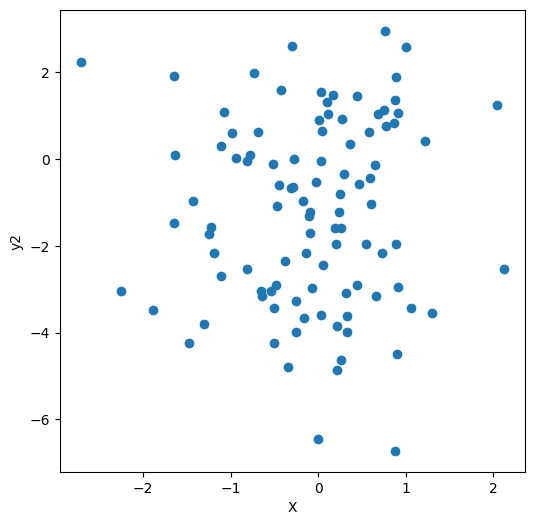

In [33]:
ax = plt.subplots(figsize=(6, 6))[1]
ax.scatter(x, y2)
ax.set_xlabel("X")
ax.set_ylabel("y2");

In [36]:
X_model_matrix2 = pd.DataFrame({"intercept":np.ones(100), "X":x})
result2 = sm.OLS(y2, X_model_matrix2).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1135
Date:                Mon, 09 Oct 2023   Prob (F-statistic):              0.737
Time:                        19:55:44   Log-Likelihood:                -217.99
No. Observations:                 100   AIC:                             440.0
Df Residuals:                      98   BIC:                             445.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.2227      0.217     -5.629      0.000      -1.654      -0.792
X              0.0854      0.254      0.337      0.737      -0.418       0.588
==============================================================================
Omnibus:                        4.179   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.124   Jarque-Bera (JB):                2.584
Skew:                          -0.186   Prob(JB):                        0.275
Kurtosis:                       2.306   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) B0 is -1.2227 and B1 is 0.0854
2) B0 is with error rate 18.2% and B1 is with error rate 485.5%.(Pretty bad for X because of high noise)

3) That means a no slope line would perform similar.

4) R-squared is very low, that means this model is not able to capture the variance of the data.

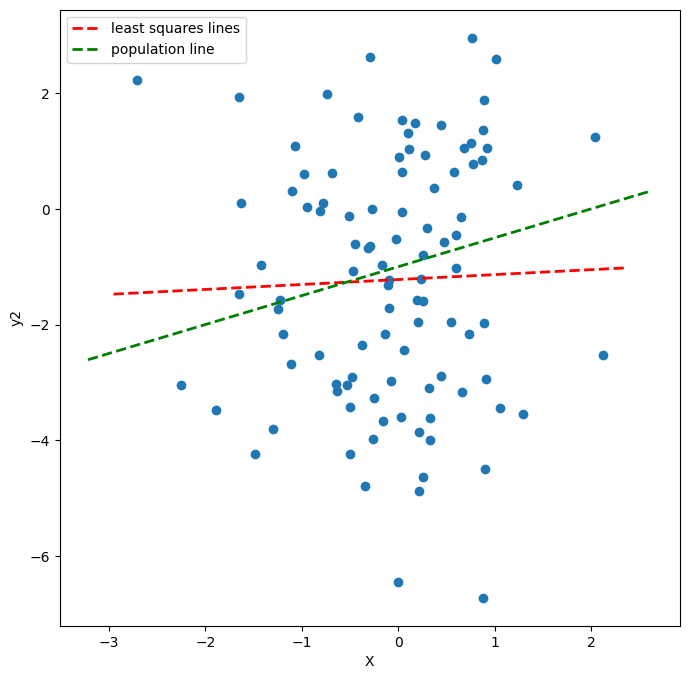

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y2)
ax.set_xlabel("X")
ax.set_ylabel("y2")
abline(ax, result1.params[1], result1.params[0], "least squares lines", color="r", linestyle="--", linewidth=2)
abline(ax, 0.5, -1, "population line", color="g", linestyle="--",linewidth=2)
ax.legend();

# 13(j)

In [40]:
result.conf_int(alpha=0.05)

,0,1
intercept,-1.384792,-1.037177
X,0.248986,0.654645


In [41]:
result1.conf_int(alpha=0.05)

,0,1
intercept,-1.038870,-0.968652
X,0.490086,0.572029


In [42]:
result2.conf_int(alpha=0.05)

,0,1
intercept,-1.653803,-0.791632
X,-0.417677,0.588457


##### Hence we can comment that as noise increases, the width of confidence interval increases(as expected) since std. error rate has increased and when noise decreases, the width of confidence interval becomes narrower.